Start by loading the PETLION package

In [1]:
using PETLION

Loading the parameters for an LCO cell

In [2]:
@time p = Params(LCO;
    N_p = 10, # discretizations in the cathode
    N_s = 10, # discretizations in the separator
    N_n = 10, # discretizations in the anode
    N_r_p = 10, # discretizations in the solid cathode particles
    N_r_n = 10, # discretizations in the solid anode particles
    temperature = false, # temperature enabled or disabled
    jacobian    = :symbolic # :symbolic or :AD
    );

 41.630636 seconds (7.72 M allocations: 467.732 MiB, 0.30% gc time, 10.05% compilation time)


Let's try charging the cell at 2C until t = 1,800 seconds, the voltage reaches 4.1 V, or any bounds in `p.bounds` are satisfied

In [3]:
model = run_model(p,1800,I=2,SOC=0,V_max=4.1,outputs=:all)

PETLION model
  --------
  Run:     I
  Time:    1388.68 s
  Voltage: 4.1 V
  Current: 2C
  Power:   239.6861 W
  SOC:     0.7691
  Exit:    Above maximum voltage limit

We hit the voltage cap, so let's run a CV hold until `SOC = 1` or `I = C/20`.

`run_model!` continues the previous model evaluation where the `!` operator indicates it is modifying `model`.

In [4]:
run_model!(model,p,V=:hold,I_min=1/20)

PETLION model
  --------
  Runs:    I → V
  Time:    2444.59 s
  Voltage: 4.1 V
  Current: 0.1921C
  Power:   23.0214 W
  SOC:     1.0
  Exit:    Above maximum SOC limit

Let's load the plotting package and show the results

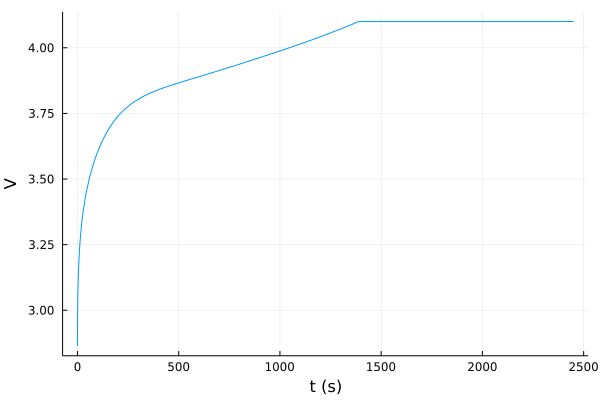

In [5]:
using Plots
plot(model,:V)

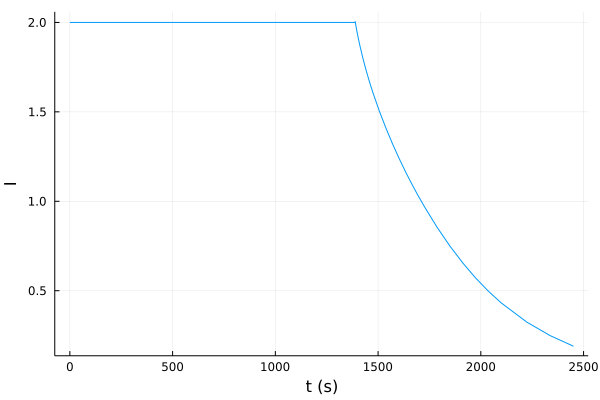

In [6]:
plot(model,:I)